**Outline for File**

1.) Preprocessing data

2.) Data Analysis (pearson & spearman rank)

3.) Statistical, Machine Learning, & Deep Learning Models 

4.) Feature Selection From Models

5.) Hyperparmater search for models

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

Small Ml Models Dataset

Top 10 Positive Pearson Correlations:
 K00395    0.452358
K05919    0.346341
K17810    0.327211
K22306    0.287708
K05337    0.262976
K20116    0.260068
K20118    0.260068
K20117    0.260068
K02440    0.232573
K07462    0.230623
dtype: float64

Top 10 Negative Pearson Correlations:
 K13288   -0.463617
K00847   -0.460380
K00355   -0.434531
K02038   -0.420828
K03589   -0.416515
K01869   -0.411883
K00767   -0.410694
K01867   -0.406093
K01081   -0.403098
K00560   -0.402850
dtype: float64

Top 10 Positive Spearman Correlations:
 K00395    0.477348
K05337    0.375223
K05919    0.313337
K07462    0.300788
K20118    0.298634
K20117    0.298634
K20116    0.298634
K17810    0.291442
K02114    0.277197
K02055    0.256413
dtype: float64

Top 10 Negative Spearman Correlations:
 K00355   -0.483564
K00847   -0.446319
K08156   -0.432417
K13288   -0.426904
K00880   -0.420519
K03589   -0.418577
K01081   -0.411905
K01867   -0.407509
K03503   -0.404727
K00560   -0.395053
dtype: float64


/tmp/ipykernel_312382/3780031136.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos_pearson.values, y=top_pos_pearson.index, palette="crest")


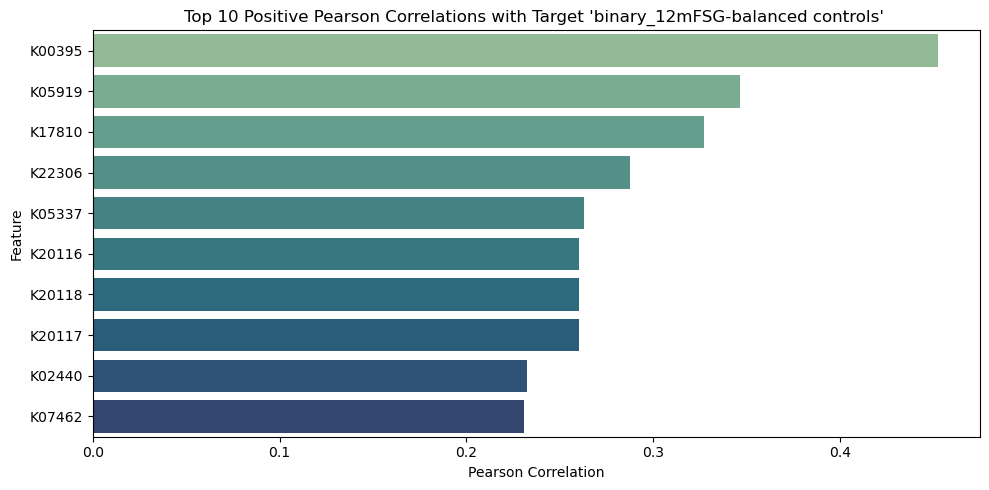

/tmp/ipykernel_312382/3780031136.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg_pearson.values, y=top_neg_pearson.index, palette="flare")


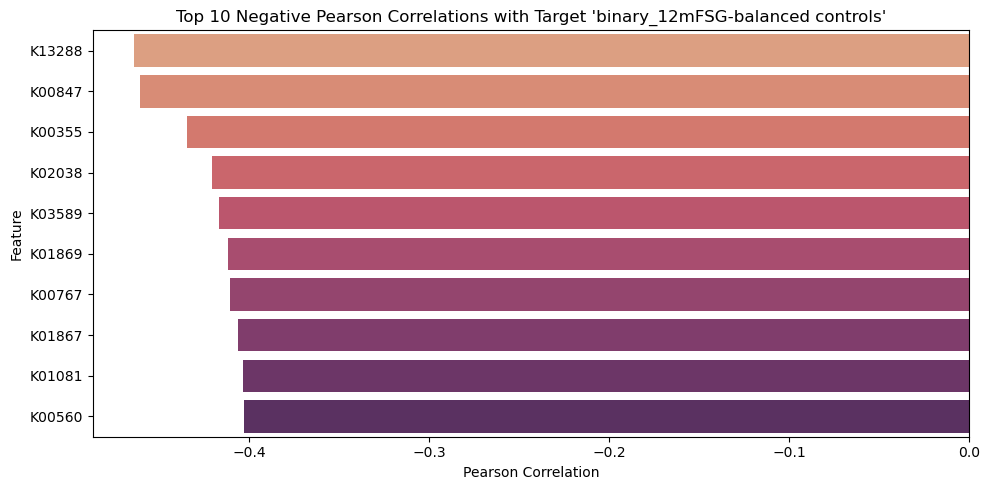

/tmp/ipykernel_312382/3780031136.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos_spearman.values, y=top_pos_spearman.index, palette="mako")


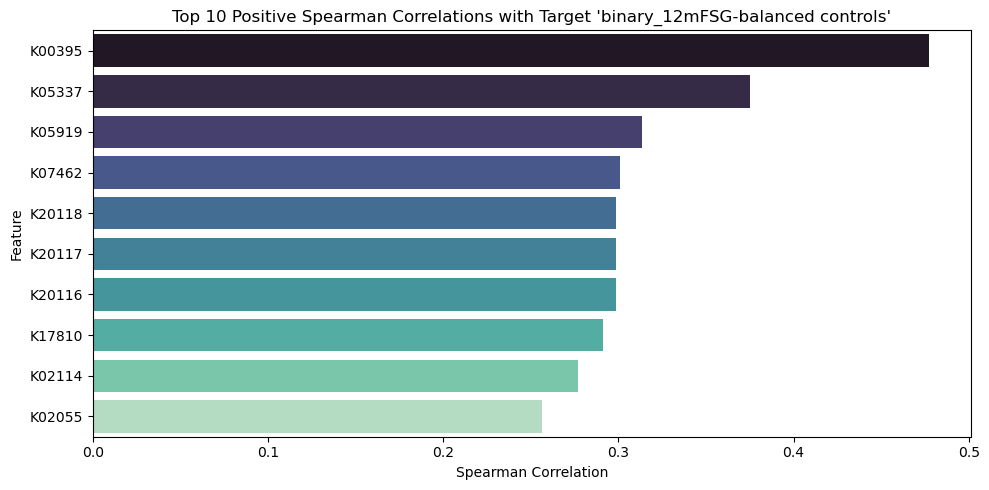

/tmp/ipykernel_312382/3780031136.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg_spearman.values, y=top_neg_spearman.index, palette="rocket")


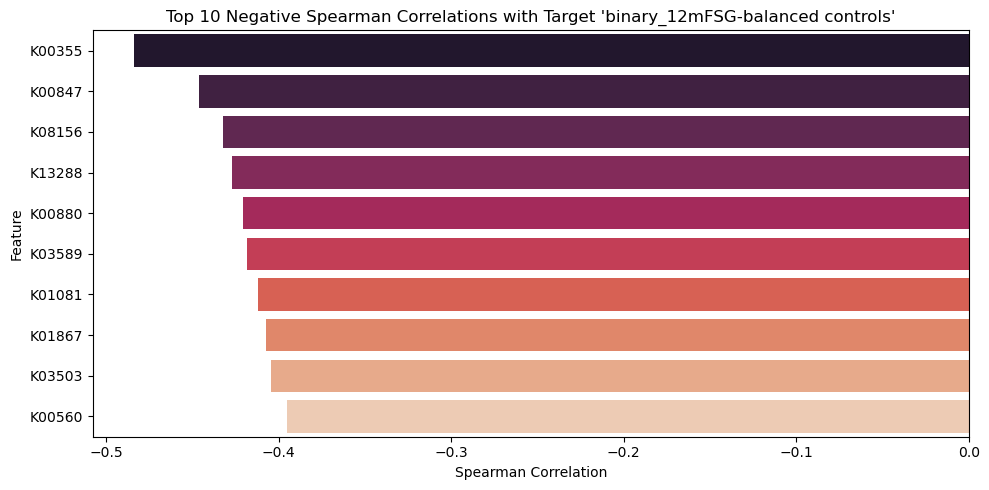

In [3]:
dat = pd.read_csv('/home/Downloads/kegg_small_ML_dataset_sibling_filtered.csv')

# Define the target variable
target_var = "binary_12mFSG"

# Drop Na
dat = dat.dropna(subset=[target_var])

# Encode categorical string labels to numeric codes
label_encoders = {}
for col in dat.select_dtypes(include=["object"]).columns:
    if col == target_var:
        continue  # Skip target for now
    le = LabelEncoder()
    dat[col] = le.fit_transform(dat[col].astype(str))
    label_encoders[col] = le

# Impute missing values in numeric columns with the mean
numeric_cols = dat.select_dtypes(include=[np.number]).columns
dat[numeric_cols] = dat[numeric_cols].fillna(dat[numeric_cols].mean())

# Encode the target variable
target_le = LabelEncoder()
dat[target_var] = target_le.fit_transform(dat[target_var].astype(str))

# Get rid of Record. Id
X = dat.drop(columns=["Record.Id", target_var])
y = dat[target_var]

#  Pearson correlation & dropping NaNs
pearson_corr_signed = dat[X.columns].corrwith(y, method='pearson').dropna().sort_values()

# Top 10 positive/negative Pearson correlations (reversed for descending order)
top_pos_pearson = pearson_corr_signed[pearson_corr_signed > 0].sort_values(ascending=False).head(10)
top_neg_pearson = pearson_corr_signed[pearson_corr_signed < 0].head(10)

# Same for Spearman
spearman_corr_signed = dat[X.columns].corrwith(y, method='spearman').dropna().sort_values()
top_pos_spearman = spearman_corr_signed[spearman_corr_signed > 0].sort_values(ascending=False).head(10)
top_neg_spearman = spearman_corr_signed[spearman_corr_signed < 0].head(10)

# Print results
print("Top 10 Positive Pearson Correlations:\n", top_pos_pearson)
print("\nTop 10 Negative Pearson Correlations:\n", top_neg_pearson)

print("\nTop 10 Positive Spearman Correlations:\n", top_pos_spearman)
print("\nTop 10 Negative Spearman Correlations:\n", top_neg_spearman)

# Plot: Positive Pearson
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pos_pearson.values, y=top_pos_pearson.index, palette="crest")
plt.title("Top 10 Positive Pearson Correlations with Target 'binary_12mFSG-balanced controls' ")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot: Negative Pearson
plt.figure(figsize=(10, 5))
sns.barplot(x=top_neg_pearson.values, y=top_neg_pearson.index, palette="flare")
plt.title("Top 10 Negative Pearson Correlations with Target 'binary_12mFSG-balanced controls'")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot: Positive Spearman
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pos_spearman.values, y=top_pos_spearman.index, palette="mako")
plt.title("Top 10 Positive Spearman Correlations with Target 'binary_12mFSG-balanced controls'")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot: Negative Spearman
plt.figure(figsize=(10, 5))
sns.barplot(x=top_neg_spearman.values, y=top_neg_spearman.index, palette="rocket")
plt.title("Top 10 Negative Spearman Correlations with Target 'binary_12mFSG-balanced controls'")
plt.xlabel("Spearman Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Statistical & Machine Learning Models Small Dataset

In [ ]:
missing_cols = X.columns[X.isnull().any()]
print("Columns with missing values:", missing_cols.tolist())
print(X[missing_cols].isnull().sum())


# Check for missing values
assert X.isnull().sum().sum() == 0, "Still missing values in features"

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models
# models = {
#     "L1 (Lasso) Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
#     "L2 (Ridge) Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000),
#     "Elastic Net Logistic Regression": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000),
#     "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Support Vector Machine": SVC(probability=True, random_state=42),
#     "Light Gradient Boosting Machines": lgb.LGBMClassifier(random_state=42)    
# }
models = {
    "L1 (Lasso) Logistic Regression": LogisticRegression(
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        C=1 
    ),
    
    "L2 (Ridge) Logistic Regression": LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        C=10
    ),
    
    "Elastic Net Logistic Regression": LogisticRegression(penalty='elasticnet',solver='saga',max_iter=1000, l1_ratio=0.3,C=0.1),
    
    "XGBoost": xgb.XGBClassifier(
        use_label_encoder=False,eval_metric='logloss', random_state=42,n_estimators=200,max_depth=5, learning_rate=0.05,subsample=0.8, 
        colsample_bytree=1.0, reg_alpha=0.1, reg_lambda=1),
    
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=500, max_depth=None, min_samples_split=2, min_samples_leaf=1,   
        max_features='sqrt', bootstrap=True),
    
    "Support Vector Machine": SVC(probability=True,random_state=42,C=1,kernel='rbf',gamma='scale',degree=3),
    
    "Light Gradient Boosting Machines": lgb.LGBMClassifier(
        random_state=42, n_estimators=200, max_depth=10, learning_rate=0.05,num_leaves=63,subsample=0.8,colsample_bytree=1.0,
        reg_alpha=0.1,reg_lambda=1
    )
}


# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    logloss = log_loss(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "ROC AUC Score": roc_auc,
        "Log Loss": logloss,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

# results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"ROC AUC Score: {metrics['ROC AUC Score']}")
    print(f"Log Loss: {metrics['Log Loss']}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print("Classification Report:\n", metrics['Classification Report']))


Deep Learning Models

In [5]:
# Deep Learning model
dnn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# Evaluate
y_pred_proba_dnn = dnn_model.predict(X_test).ravel()
y_pred_dnn = (y_pred_proba_dnn > 0.5).astype(int)

# Metrics
acc_dnn = accuracy_score(y_test, y_pred_dnn)
roc_dnn = roc_auc_score(y_test, y_pred_proba_dnn)
logloss_dnn = log_loss(y_test, y_pred_proba_dnn)
conf_matrix_dnn = confusion_matrix(y_test, y_pred_dnn)
report_dnn = classification_report(y_test, y_pred_dnn)

# Print Results
print("\nDeep Neural Network:")
print(f"Accuracy: {acc_dnn}")
print(f"ROC AUC Score: {roc_dnn}")
print(f"Log Loss: {logloss_dnn}")
print("Confusion Matrix:\n", conf_matrix_dnn)
print("Classification Report:\n", report_dnn)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-20 22:45:54.924699: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-04-20 22:45:54.924718: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-04-20 22:45:54.924722: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: insight161
2025-04-20 22:45:54.924724: I external/local_xla/xla/stream_exe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Deep Neural Network:
Accuracy: 0.7
ROC AUC Score: 0.88
Log Loss: 0.444439617768257
Confusion Matrix:
 [[3 2]
 [1 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



Feature Importance



--- Variable Importance by Model ---

L1 (Lasso) Logistic Regression:
K09803    1.210796
K04656    1.189921
K00355    0.829117
K00018    0.768108
K01191    0.767087
K21600    0.531173
K03466    0.530246
K02050    0.341645
K21885    0.257033
K07011    0.221801
K08156    0.200634
K18013    0.150777
K02435    0.141280
K07738    0.094419
K09974    0.085181
K02316    0.063752
K01239    0.059807
K07272    0.028454
K00395    0.017987
K00184    0.015178
dtype: float64


/tmp/ipykernel_312382/2476569646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


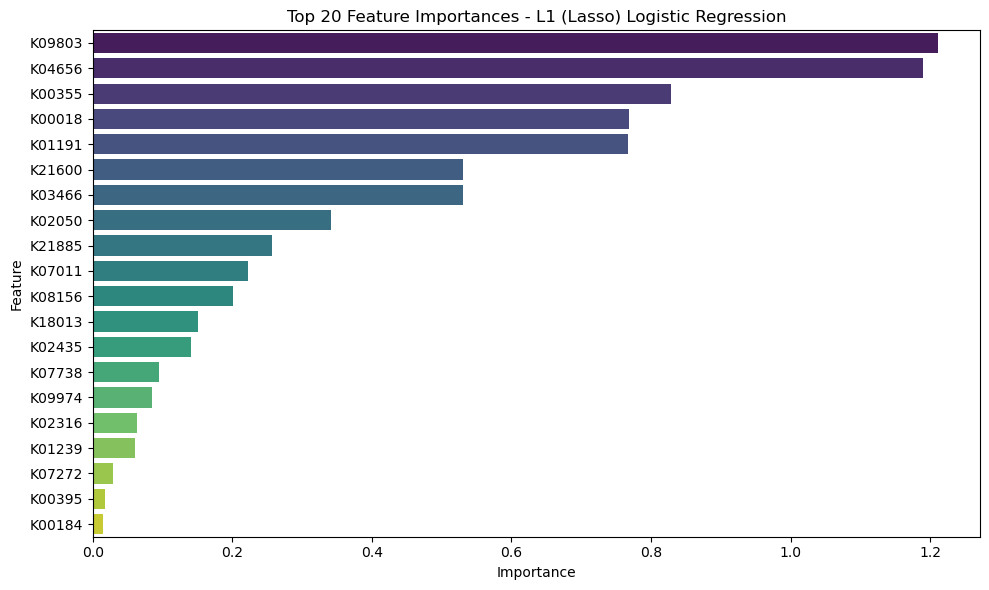


L2 (Ridge) Logistic Regression:
K04656    0.606267
K02050    0.426789
K09803    0.421412
K01191    0.412857
K09974    0.409558
K21885    0.391909
K03740    0.290735
K07011    0.286296
K02574    0.285181
K14061    0.253556
K04749    0.247475
K00184    0.246118
K02316    0.245242
K03466    0.237806
K11900    0.237074
K06902    0.229757
K07272    0.222244
K01482    0.216667
K00395    0.210787
K02026    0.210351
dtype: float64


/tmp/ipykernel_312382/2476569646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


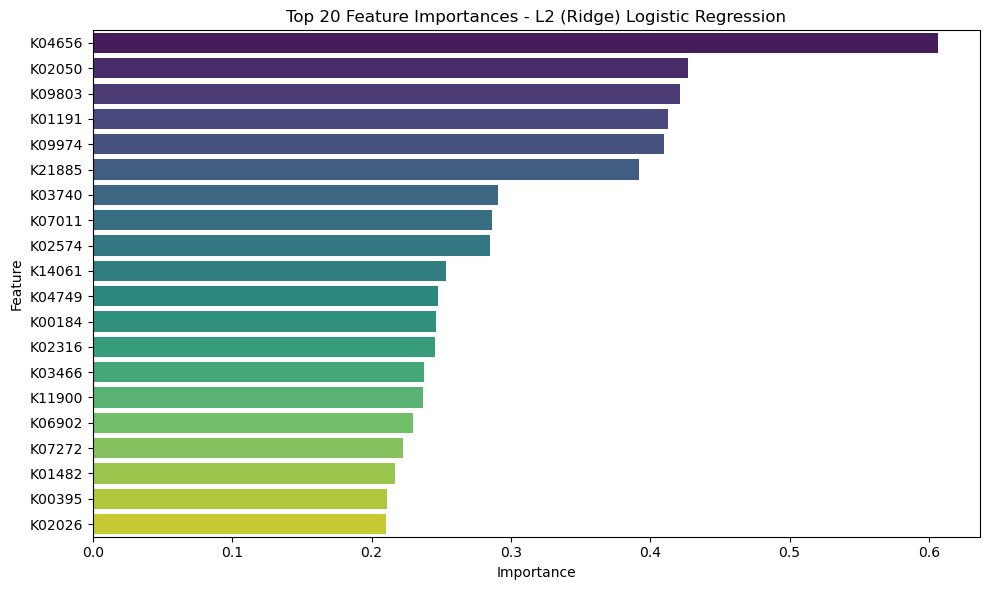


Elastic Net Logistic Regression:
K04656    0.975990
K09803    0.817776
K01191    0.600806
K02050    0.499552
K00018    0.340784
K09974    0.336180
K00355    0.315155
K03466    0.311412
K21885    0.309837
K00395    0.280427
K21600    0.275631
K07738    0.240296
K07011    0.234755
K02574    0.227981
K00927    0.227099
K02071    0.201472
K01186    0.193772
K01239    0.189517
K08156    0.178661
K02316    0.167214
dtype: float64


/tmp/ipykernel_312382/2476569646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


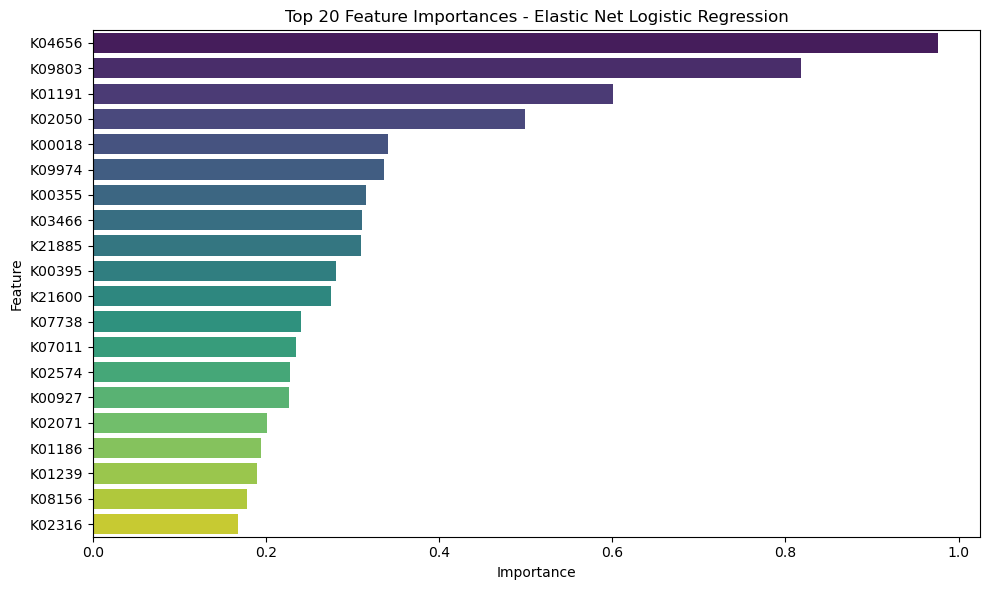


XGBoost:
K06024    0.141578
K00930    0.105528
K00941    0.084553
K01903    0.069092
K02790    0.058154
K08156    0.056056
K00847    0.050202
K01443    0.043514
K02036    0.042112
K01659    0.032232
K01580    0.029058
K01361    0.021728
K02316    0.020307
K00558    0.020122
K09803    0.019839
K00259    0.018298
K00183    0.015087
K20107    0.013886
K07774    0.013550
K09704    0.012608
dtype: float32


/tmp/ipykernel_312382/2476569646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


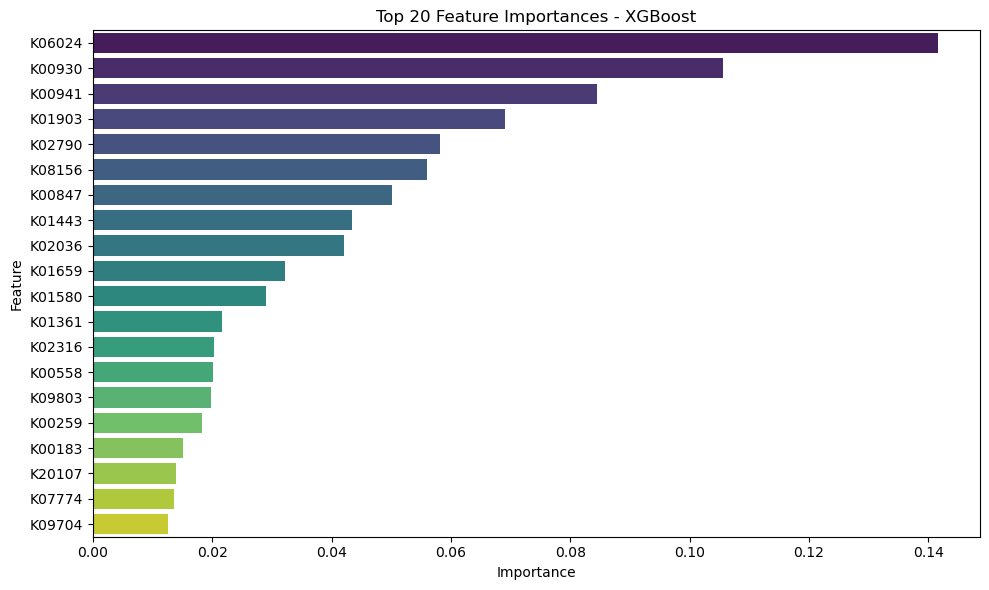


Random Forest:
K00259    0.029979
K08156    0.024185
K02956    0.021022
K02564    0.020479
K01191    0.020000
K07462    0.019185
K04021    0.017120
K00847    0.015606
K03517    0.015338
K00355    0.015030
K09803    0.012753
K01186    0.012605
K04656    0.012034
K03695    0.011295
K01867    0.009966
K00560    0.009275
K08484    0.008917
K00949    0.008671
K07473    0.008646
K02035    0.008341
dtype: float64


/tmp/ipykernel_312382/2476569646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


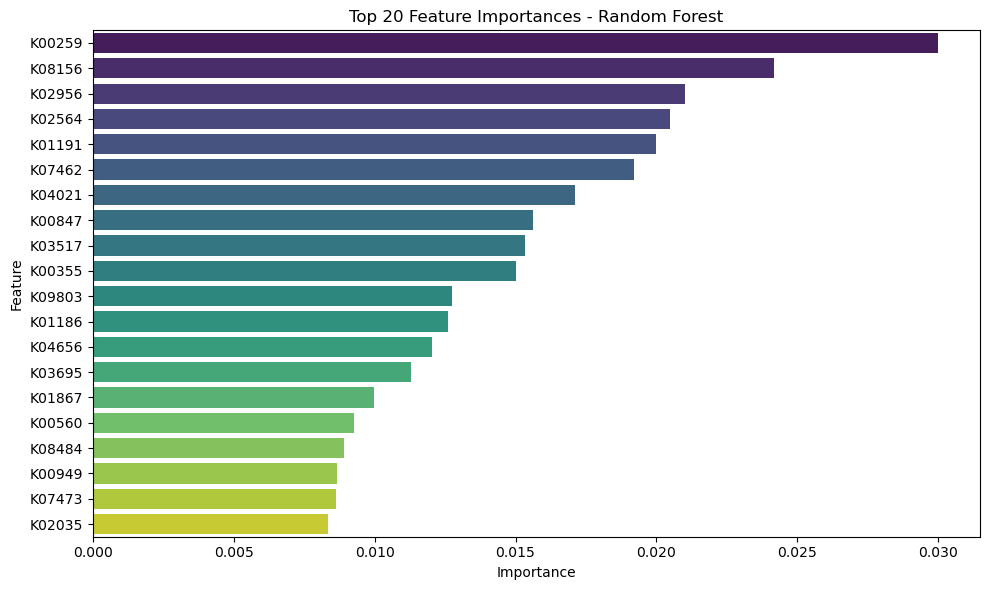


Support Vector Machine:
Model does not support direct feature importance extraction.

Light Gradient Boosting Machines:
K03589    19
K02358    12
K09803    10
K03767    10
K01443     9
K01938     9
K05337     6
K01191     5
K07025     4
K01590     4
K08281     2
K00930     2
K00620     2
K07177     2
K21885     1
K03799     1
K08681     1
K00184     1
K06915     0
K07011     0
dtype: int32


/tmp/ipykernel_312382/2476569646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


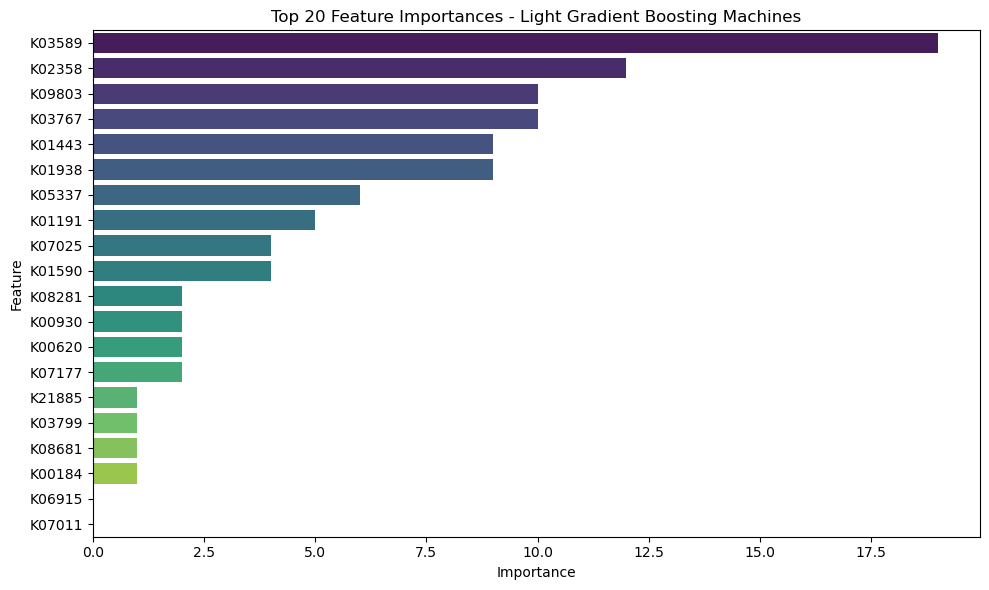

In [6]:
print("\n\n--- Variable Importance by Model ---")
feature_names = X.columns

for name, model in models.items():
    print(f"\n{name}:")
    
    try:
        if hasattr(model, "coef_"):
            # Logistic Regressions
            coefs = model.coef_[0]
            importance = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)
        elif hasattr(model, "feature_importances_"):
            # Tree-based models
            importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        else:
            print("Model does not support direct feature importance extraction.")
            continue

        top_features = importance.head(20)
        print(top_features)

        # Plotting
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
        plt.title(f"Top 20 Feature Importances - {name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not extract or plot importance for {name}: {e}")

Hyperparamater search - Run separately

In [ ]:
# grid_hyperparam_search.py
from time import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report


RANDOM_STATE = 42
CV_FOLDS = 5
N_JOBS = -1
VERBOSE = 2
SCORING = 'roc_auc'        #edit as needed to f1 or other alternatives
TOP_K_RESULTS = 10
OUTPUT_DIR = "hps_results_grid"
os.makedirs(OUTPUT_DIR, exist_ok=True)

models = {
    "L1 (Lasso) Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=RANDOM_STATE),
    "L2 (Ridge) Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=RANDOM_STATE),
    "Elastic Net Logistic Regression": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000, random_state=RANDOM_STATE),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Support Vector Machine": SVC(probability=True, random_state=RANDOM_STATE),
    "Light Gradient Boosting Machines": lgb.LGBMClassifier(random_state=RANDOM_STATE)
}

param_grids = {
    "L1 (Lasso) Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10, 100],
    },
    "L2 (Ridge) Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10, 100],
    },
    "Elastic Net Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__l1_ratio': [0.1, 0.3, 0.5, 0.7],  # only used when penalty='elasticnet'
    },
    "XGBoost": {
        'clf__n_estimators': [100, 200, 500],
        'clf__max_depth': [3, 5, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.8, 1.0],
        'clf__reg_alpha': [0, 0.1],
        'clf__reg_lambda': [0, 1]
    },
    "Random Forest": {
        'clf__n_estimators': [100, 200, 500],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5],
        'clf__min_samples_leaf': [1, 2],
        'clf__max_features': ['sqrt', 'log2', None],
        'clf__bootstrap': [True, False],
    },
    "Support Vector Machine": {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto', 0.01, 0.1],
    },
    "Light Gradient Boosting Machines": {
        'clf__n_estimators': [100, 200, 500],
        'clf__max_depth': [-1, 5, 10],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__num_leaves': [31, 63],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.8, 1.0],
        'clf__reg_alpha': [0, 0.1],
        'clf__reg_lambda': [0, 1],
    }
}

def make_pipeline(name, estimator):
    """
    Returns a pipeline (scaler optional) and the grid for that model.
    NOTE: You said you already scaled your X (X_scaled). This pipeline does not add a scaler.
    If you want scaling inside CV, replace Pipeline([('clf', estimator)]) with:
        Pipeline([('scaler', StandardScaler()), ('clf', estimator)])
    and pass raw X (not pre-scaled).
    """
    pipe = Pipeline([('clf', estimator)])
    grid = param_grids.get(name, {})
    return pipe, grid

#GridSearchCV
def run_grid_search(X_train, y_train, X_test, y_test):
    results = {}
    # Deterministic Stratified folds (no shuffle)
    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=False)
    
    for name, estimator in models.items():
        print("="*80)
        print(f"Grid searching: {name}")
        pipe, grid = make_pipeline(name, estimator)
        if not grid:
            print(f"Warning: no param grid found for {name}, skipping.")
            continue

        searcher = GridSearchCV(
            pipe,
            param_grid=grid,
            scoring=SCORING,
            n_jobs=N_JOBS,
            cv=cv,
            verbose=VERBOSE,
            return_train_score=True
        )

        t0 = time()
        searcher.fit(X_train, y_train)
        elapsed = time() - t0

        print(f"Done {name} in {elapsed:.1f}s")
        print("Best CV score:", searcher.best_score_)
        print("Best params:", searcher.best_params_)

        # Save best estimator
        safe_name = name.replace(" ", "_").replace("(", "").replace(")", "")
        model_path = os.path.join(OUTPUT_DIR, f"{safe_name}_best.pkl")
        joblib.dump(searcher.best_estimator_, model_path)
        print("Saved best model to:", model_path)

        # Save top CV results to CSV
        cvres = pd.DataFrame(searcher.cv_results_)
        if 'rank_test_score' in cvres.columns:
            cvres = cvres.sort_values('rank_test_score')
        else:
            cvres = cvres.sort_values('mean_test_score', ascending=False)
        csv_path = os.path.join(OUTPUT_DIR, f"{safe_name}_cv_results_top{TOP_K_RESULTS}.csv")
        cvres.head(TOP_K_RESULTS).to_csv(csv_path, index=False)
        print("Saved top CV results to:", csv_path)

        # Evaluate on test set with the best estimator
        best = searcher.best_estimator_
        y_pred_proba = best.predict_proba(X_test)[:, 1] if hasattr(best, "predict_proba") else best.decision_function(X_test)
        y_pred = best.predict(X_test)
        test_roc = roc_auc_score(y_test, y_pred_proba)
        test_acc = accuracy_score(y_test, y_pred)

        print(f"Test ROC AUC: {test_roc:.4f}   Test Acc: {test_acc:.4f}")
        print("Classification report (test):")
        print(classification_report(y_test, y_pred))

        results[name] = {
            'searcher': searcher,
            'best_score': searcher.best_score_,
            'best_params': searcher.best_params_,
            'test_roc_auc': test_roc,
            'test_accuracy': test_acc,
            'cv_results_df': cvres
        }

    return results

if __name__ == "__main__":
    # Run Grid Search
    results = run_grid_search(X_train, y_train, X_test, y_test)

    # Print concise summary
    print("\nSUMMARY:")
    for name, info in results.items():
        print(f"{name}: best_CV_score={info['best_score']:.4f}  test_roc_auc={info['test_roc_auc']:.4f}")


**End**